# Módulo 5 Actvidad 8

## Intención del aprendizaje esperado:


**8. Elaborar un modelo predictivo aplicando el algoritmo clasificador SVM para resolver un problema de clasificación utilizando lenguaje Python**

**Ejercicios Planteados**


Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, 
SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:


• Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.


• Velocidad angular triaxial del giroscopio.


• Variables de dominio de tiempo y frecuencia.


• Su etiqueta de actividad.


• Un identificador del sujeto que realizó el experimento.


El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba

*Estos datos se encuentran en los siguientes links:*



https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv

https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv



a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

In [14]:
import pandas as pd

url_train = 'https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv'
url_test = 'https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv'

data_entrenamiento = pd.read_csv(url_train)
data_prueba = pd.read_csv(url_test)

dimensiones_data_entrenamiento = data_entrenamiento.shape
dimensiones_data_prueba = data_prueba.shape

print(' DIMENSIONES DE DATAFRAMES '.center(40, '='))
print()
print('ENTRENAMIENTO '.ljust(20, '.') + ' PRUEBA'.rjust(20, '.'))
print()
print(f'{dimensiones_data_entrenamiento[0]} Filas '.ljust(20, '.') + f' {dimensiones_data_prueba[0]} Filas'.rjust(20, '.'))
print(f'{dimensiones_data_entrenamiento[1]} Columnas '.ljust(20, '.') + f' {dimensiones_data_prueba[1]} Columnas'.rjust(20, '.'))
print()
print('=' * 40)

====== DIMENSIONES DE DATAFRAMES =======

ENTRENAMIENTO ................... PRUEBA

7352 Filas .................. 2947 Filas
563 Columnas .............. 563 Columnas



**b) Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas crosstab *(index=columna, columns="count")*. ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.**

TABLA DE FRECUENCIA ACTIVIDADES ENTRENAMIENTO
_____________________________________________
col_0               Cantidad
Activity                    
LAYING                  1407
SITTING                 1286
STANDING                1374
WALKING                 1226
WALKING_DOWNSTAIRS       986
WALKING_UPSTAIRS        1073
_____________________________________________



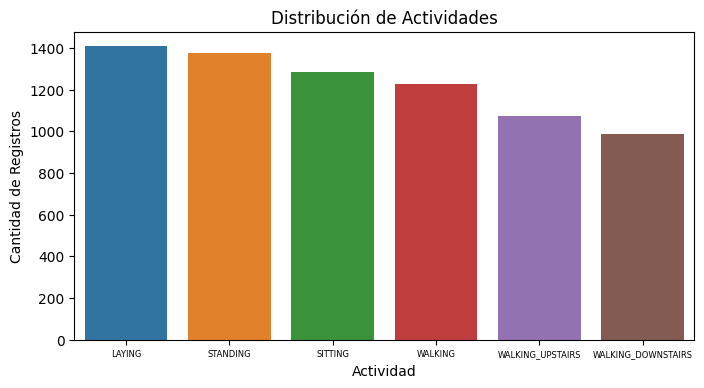

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tabla_frecuencia = pd.crosstab(index=data_entrenamiento['Activity'], columns="Cantidad")

print('TABLA DE FRECUENCIA ACTIVIDADES ENTRENAMIENTO')
print('_' * 45)
print(tabla_frecuencia)
print('_' * 45)
print()

plt.figure(figsize=(8, 4))
sns.countplot(data=data_entrenamiento, x='Activity', order=data_entrenamiento['Activity'].value_counts().index)
plt.title('Distribución de Actividades')
plt.xlabel('Actividad')
plt.ylabel('Cantidad de Registros')
plt.xticks(fontsize=6)

plt.show()



Las tabla de frecuencia nos revela que existe un desbalance entre las actividades teniendo la mayor cantidad de registros la actividad *'Laying'* (1407) y la menor cantidad en *'Walking Downstairs'* (986).



**c) Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).**

**d) Estandarice el set de features de entrenamiento y prueba. Recuerde que puede utilizar la función vista en clases StandardScaler:**


*from sklearn.preprocessing import StandardScaler*


*x_stand = StandardScaler().fit_transform(x)*

In [16]:
from sklearn.preprocessing import StandardScaler

X_train = data_entrenamiento.drop('Activity', axis=1)
X_test = data_prueba.drop('Activity', axis=1)

X_train_stand = StandardScaler().fit_transform(X_train)
X_test_stand = StandardScaler().fit_transform(X_test)


**e) Defina y_train e y_test como corresponda (recuerde que debe estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar:**


*from sklearn import preprocessing*


*encoder=preprocessing.LabelEncoder().fit(y)*


*y_new=encodertrain.transform(y)*

In [17]:
from sklearn import preprocessing

y_train = data_entrenamiento['Activity']
y_test = data_prueba['Activity']

encoder = preprocessing.LabelEncoder().fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)



**f) Defina un diccionario con las opciones de:**


*El kernel se mueva entre linear o rbf*


*El C se mueva entre los valores 10 y 15*

**g) Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

diccionario_parametros = {'kernel': ['linear', 'rbf'], 'C': [10, 15]}

modelo_SVM = SVC()

grid_search = GridSearchCV(estimator=modelo_SVM, param_grid=diccionario_parametros, cv=10)
grid_search.fit(X_train_stand, y_train_encoded)


mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_


print(' RESULTADOS '.center(80, '=') + '\n')
print('Mejor combinación de parámetros '.ljust(50, '.') + f' {mejores_parametros}'.rjust(30, '.'))
print('Modelo con los mejores parámetros '.ljust(60, '.') + f'  {mejor_modelo}'.rjust(20, '.'))
print('\n' + '=' * 80)


================================== RESULTADOS ==================================

Mejor combinación de parámetros ..................... {'C': 10, 'kernel': 'rbf'}
Modelo con los mejores parámetros ...................................  SVC(C=10)



**h) ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.**

In [19]:
from sklearn.metrics import classification_report

y_pred = mejor_modelo.predict(X_test_stand)

print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       537
           1       0.95      0.90      0.93       491
           2       0.92      0.96      0.94       532
           3       0.98      0.96      0.97       496
           4       0.96      0.94      0.95       420
           5       0.95      0.99      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



La capacidad predictiva del modelo en el set de prueba es bastante afinada, con valores de métricas muy cercanas a predicciones perfectas.  Respecto al f1_score el valor más bajo es de 93%, lo que resulta sorprendente en consideración que son 6 categorías siendo todas las demás mucho más elevadas que este valor.  En cuanto al *accuracy* del modelo, el porcentaje de exactitud se eleva hasta el 96%.